In [22]:
# 30
import re

docs = ""
with open('neko.txt.mecab') as f:
    docs = f.read()
dic = []
mor = []
for para in docs.split("\n"):
    if para == '':
        continue
    elif para == "EOS":
        dic.append(mor)
        mor = []
    else:
        surface, pos, pos1, pos2, pos3, _, _, base, *_ = re.split('[,\t]', para)
        if surface != '':
            mor.append({
                'surface': surface,
                'base': base,
                'pos': pos,
                'pos1': pos1,
            })

dic = [_dic for _dic in dic if _dic != []]
print(len(dic))
print(dic[1])

9210
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]


In [2]:
# 31
verb_surface = []
for sentence in dic:
    for mor in sentence:
        if mor['pos'] == '動詞':
            verb_surface.append(mor['surface'])

print(len(verb_surface))
print(verb_surface[0:100])


28906
['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮', '食う', '思わ', '載せ', 'られ', '持ち上げ', 'られ', 'し', 'あっ', '落ちつい', '見', '見', '思っ', '残っ', 'いる', 'さ', 'れ', 'し', '逢っ', '出会わ', 'し', 'のみ', 'なら', 'し', 'いる', '吹く', 'せ', '弱っ', '飲む', '知っ', '坐っ', 'おっ', 'する', 'し', '始め', '動く', '動く', '分ら', '廻る', 'なる', '助から', '思っ', 'いる', 'さり', 'し', '出', 'し', 'いる', '考え出そ', '分ら', '付い', '見る', 'い', 'おっ', '見え', '隠し', 'しまっ', '違っ', '明い', 'い', 'られ', '這い出し', '見る', '棄て', 'られ', '這い出す', 'ある', '坐っ', 'し', '考え', '見', '出', 'し', '泣い', '来', 'くれる', '考え付い', 'やっ', '見', '来', '渡っ', 'かかる', '減っ', '来', '泣き', '出', 'ある', 'ある', 'し', 'そろ']


In [3]:
# 32
verb_base = []
for sentence in dic:
    for mor in sentence:
        if mor['pos'] == '動詞':
            verb_base.append(mor['base'])

print(len(verb_base))
print(verb_base[0:100])

28906
['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'られる', 'する', 'ある', '落ちつく', '見る', '見る', '思う', '残る', 'いる', 'する', 'れる', 'する', '逢う', '出会う', 'する', 'のむ', 'なる', 'する', 'いる', '吹く', 'する', '弱る', '飲む', '知る', '坐る', 'おる', 'する', 'する', '始める', '動く', '動く', '分る', '廻る', 'なる', '助かる', '思う', 'いる', 'さる', 'する', '出る', 'する', 'いる', '考え出す', '分る', '付く', '見る', 'いる', 'おる', '見える', '隠す', 'しまう', '違う', '明く', 'いる', 'られる', '這い出す', '見る', '棄てる', 'られる', '這い出す', 'ある', '坐る', 'する', '考える', '見る', '出る', 'する', '泣く', '来る', 'くれる', '考え付く', 'やる', '見る', '来る', '渡る', 'かかる', '減る', '来る', '泣く', '出る', 'ある', 'ある', 'する', 'そる']


In [5]:
noun_junc_no = []
for sentence in dic:
    for i in range(len(sentence) - 2):
        mor_a, mor_junc, mor_b = sentence[i:i+3]
        if mor_junc['surface'] == mor_junc['base'] == 'の' and mor_junc['pos'] == "助詞" and mor_a['pos'] == mor_b['pos'] == "名詞":
            noun_junc_no.append(f'{mor_a["surface"]} {mor_junc["surface"]} {mor_b["surface"]}')

print(len(noun_junc_no))
print(noun_junc_no[0:100])

6044
['彼 の 掌', '掌 の 上', '書生 の 顔', 'はず の 顔', '顔 の 真中', '穴 の 中', '書生 の 掌', '掌 の 裏', '何 の 事', '肝心 の 母親', '藁 の 上', '笹原 の 中', '池 の 前', '池 の 上', '一樹 の 蔭', '垣根 の 穴', '隣家 の 三', '時 の 通路', '一刻 の 猶予', '家 の 内', '彼 の 書生', '以外 の 人間', '前 の 書生', 'おさん の 隙', 'おさん の 三', '胸 の 痞', '家 の 主人', '主人 の 方', '鼻 の 下', '吾輩 の 顔', '自分 の 住', '吾輩 の 主人', '家 の もの', 'うち の もの', '彼 の 書斎', '本 の 上', '皮膚 の 色', '本 の 上', '彼 の 毎夜', '以外 の もの', '主人 の 傍', '彼 の 膝', '膝 の 上', '経験 の 上', '飯櫃 の 上', '炬燵 の 上', 'ここ の うち', '供 の 寝床', '彼等 の 中間', '供 の 一', '例 の 神経', '性 の 主人', '次 の 部屋', '自分 の 勝手', '吾輩 の 方', '台所 の 板の間', '吾輩 の 尊敬', '向 の 白', '玉 の よう', 'そこ の 家', '家 の 書生', '裏 の 池', '親子 の 愛', 'もっとも の 議論', '刺 の 頭', '鰡 の 臍', '彼等 の ため', '軍人 の 家', '代言 の 主人', '教師 の 家', '猫 の 時節', '吾輩 の 家', '家 の 主人', 'だらけ の 英文', '胃弱 の 癖', '後架 の 中', '平 の 宗', '月 の 月給', '当分 の 間', '下 の よう', '今更 の よう', '主人 の 述懐', '彼 の 友', '金縁 の 眼鏡', '主人 の 顔', '内 の 想像', '訳 の もの', '利 の 大家', '金縁 の 裏', '吾輩 の 後ろ', '彼 の 友', '吾輩 の 輪廓', '顔 の あたり', '上乗 の 出来', '顔 の 造作', '他 の 猫', '不器量 の 吾輩', '吾輩 の 主人', '斯産 の 猫

In [13]:
# 34

noun_junc = []
for sentence in dic:
    index = 0
    buf = []
    while index < len(sentence):
        mor = sentence[index]
        if mor['pos'] == "名詞":
            buf.append(mor["surface"])
        else:
            if buf != []:
                noun_junc.append(buf)
                buf = []
        index += 1

print(len(noun_junc))
print(noun_junc[0:100])

# より長い連接の順にソート
sorted_noun_junc = sorted(noun_junc, key=lambda x: -len(x))
print(sorted_noun_junc[0:100])

49067
[['吾輩'], ['猫'], ['名前'], ['どこ'], ['見当'], ['何'], ['所'], ['ニャーニャー'], ['いた事'], ['記憶'], ['吾輩'], ['ここ'], ['人間'], ['もの'], ['あと'], ['それ'], ['書生'], ['人間', '中'], ['一番', '獰悪'], ['種族'], ['そう'], ['書生'], ['の'], ['我々'], ['話'], ['当時'], ['何'], ['考'], ['彼'], ['掌'], ['スー'], ['時'], ['感じ'], ['掌'], ['上'], ['書生'], ['顔'], ['の'], ['人間'], ['もの'], ['始'], ['時', '妙'], ['もの'], ['感じ'], ['今'], ['一', '毛'], ['装飾'], ['はず'], ['顔'], ['薬缶'], ['その後', '猫'], ['輪'], ['一', '度'], ['事'], ['顔'], ['真中'], ['突起'], ['穴'], ['中'], ['ぷうぷうと', '煙'], ['咽'], ['これ'], ['人間'], ['煙草'], ['もの'], ['事'], ['頃'], ['書生'], ['掌'], ['裏'], ['心持'], ['非常'], ['速力'], ['運転'], ['書生'], ['の'], ['自分'], ['の'], ['眼'], ['胸'], ['音'], ['眼'], ['火'], ['それ'], ['記憶'], ['あと'], ['何'], ['事'], ['気'], ['書生'], ['たくさん'], ['兄弟'], ['一疋'], ['肝心'], ['母親'], ['姿'], ['上今'], ['所'], ['眼'], ['何']]
[['many', 'a', 'slip', "'", 'twixt', 'the', 'cup', 'and', 'the', 'lip'], ['明治', '三', '十', '八', '年', '何', '月', '何', '日', '戸締り'], ['八', '万', '八', '千', '八', '百', '八', '十', '本'], ['明治', '十', '一'

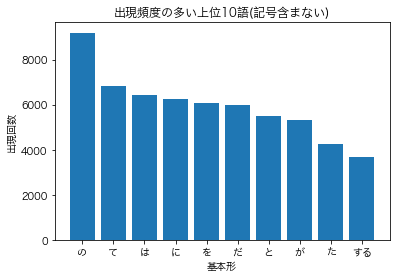

In [51]:
# 36
from collections import defaultdict 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Hiragino Sans GB'

dic_count_freq = defaultdict(int)
for sentence in dic:
    for mor in sentence:
        if mor['pos'] != "記号":
            dic_count_freq[mor['base']] += 1

sorted_dic_count_freq = sorted(dic_count_freq.items(), key=lambda x:-x[1])

base = []
count = []
for i in range(10):
    base.append(sorted_dic_count_freq[i][0])
    count.append(sorted_dic_count_freq[i][1])
plt.bar(base, count)
plt.title("出現頻度の多い上位10語(記号含まない)")
plt.xlabel("基本形")
plt.ylabel("出現回数")
plt.show()


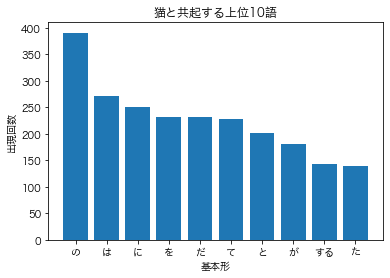

In [42]:
# 37
dic_co_occur_with_cat = defaultdict(int)
for sentence in dic:
    if "猫" in [mor['base'] for mor in sentence]:
        for mor in sentence:
            if mor['pos'] != "記号" and mor['base'] != "猫" :
                dic_co_occur_with_cat[mor['base']] += 1

sorted_dic_co_occur_with_cat = sorted(dic_co_occur_with_cat.items(), key=lambda x:-x[1])

base = []
count = []
for i in range(10):
    base.append(sorted_dic_co_occur_with_cat[i][0])
    count.append(sorted_dic_co_occur_with_cat[i][1])
plt.bar(base, count)
plt.title("猫と共起する上位10語")
plt.xlabel("基本形")
plt.ylabel("出現回数")
plt.show()


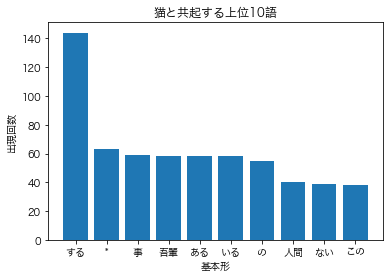

In [46]:
# 37+ (助詞/助動詞を除く)

dic_co_occur_with_cat = defaultdict(int)
for sentence in dic:
    if "猫" in [mor['base'] for mor in sentence]:
        for mor in sentence:
            if mor['pos'] != "記号" and mor['base'] != "猫" and mor['pos'] != "助詞" and mor['pos'] != "助動詞" :
                dic_co_occur_with_cat[mor['base']] += 1

sorted_dic_co_occur_with_cat = sorted(dic_co_occur_with_cat.items(), key=lambda x:-x[1])

base = []
count = []
for i in range(10):
    base.append(sorted_dic_co_occur_with_cat[i][0])
    count.append(sorted_dic_co_occur_with_cat[i][1])
plt.bar(base, count)
plt.title("猫と共起する上位10語(助詞/助動詞を除く)")
plt.xlabel("基本形")
plt.ylabel("出現回数")
plt.show()

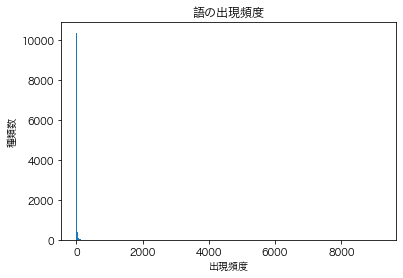

In [64]:
# 38
plt.hist(dic_count_freq.values(), bins=500)
plt.title("語の出現頻度")
plt.xlabel("出現頻度")
plt.ylabel("種類数")
plt.show()

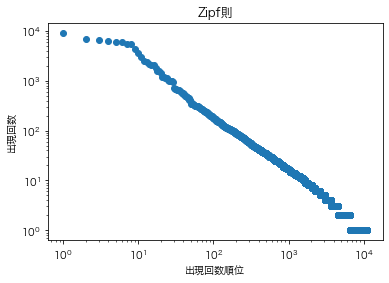

In [73]:
# 39
count = []
for kv in sorted_dic_count_freq:
    count.append(kv[1])
plt.scatter(list(map(lambda x: x + 1, list(range(len(count))))), count)
plt.title('Zipf則')
plt.xlabel("出現回数順位")
plt.ylabel("出現回数")
plt.xscale('log')
plt.yscale('log')
plt.show()